In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abrambeyer/openintro-possum")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 2.15k/2.15k [00:00<00:00, 2.62MB/s]

Extracting files...
Path to dataset files: C:\Users\91912\.cache\kagglehub\datasets\abrambeyer\openintro-possum\versions\1


In [5]:
data = pd.read_csv(r"C:\Users\91912\.cache\kagglehub\datasets\abrambeyer\openintro-possum\versions\1\possum.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [9]:
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [11]:
datac = data.copy()

In [37]:
datac.fillna({"age":datac["age"].mean(),"footlgth":datac["footlgth"].mean()},inplace = True)

In [39]:
fv = datac.iloc[:,[1,2,3,5,6,7,8,9,10,11,12,13]]

In [41]:
cv = datac.iloc[:,4]

In [43]:
fv.head(1)

,site,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0


In [69]:
fv["Pop"] = fv["Pop"].map({"Vic":0,"other":1})

C:\Users\91912\AppData\Local\Temp\ipykernel_30764\1260932693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fv["Pop"] = fv["Pop"].map({"Vic":0,"other":1})


In [71]:
fv["sex"] = fv["sex"].map({"m":0,"f":1})

C:\Users\91912\AppData\Local\Temp\ipykernel_30764\3674773313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fv["sex"] = fv["sex"].map({"m":0,"f":1})


In [73]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size = 0.1,random_state = 47)

In [93]:
dct = DecisionTreeRegressor(max_depth = 4)

In [95]:
model = dct.fit(x_train,y_train)

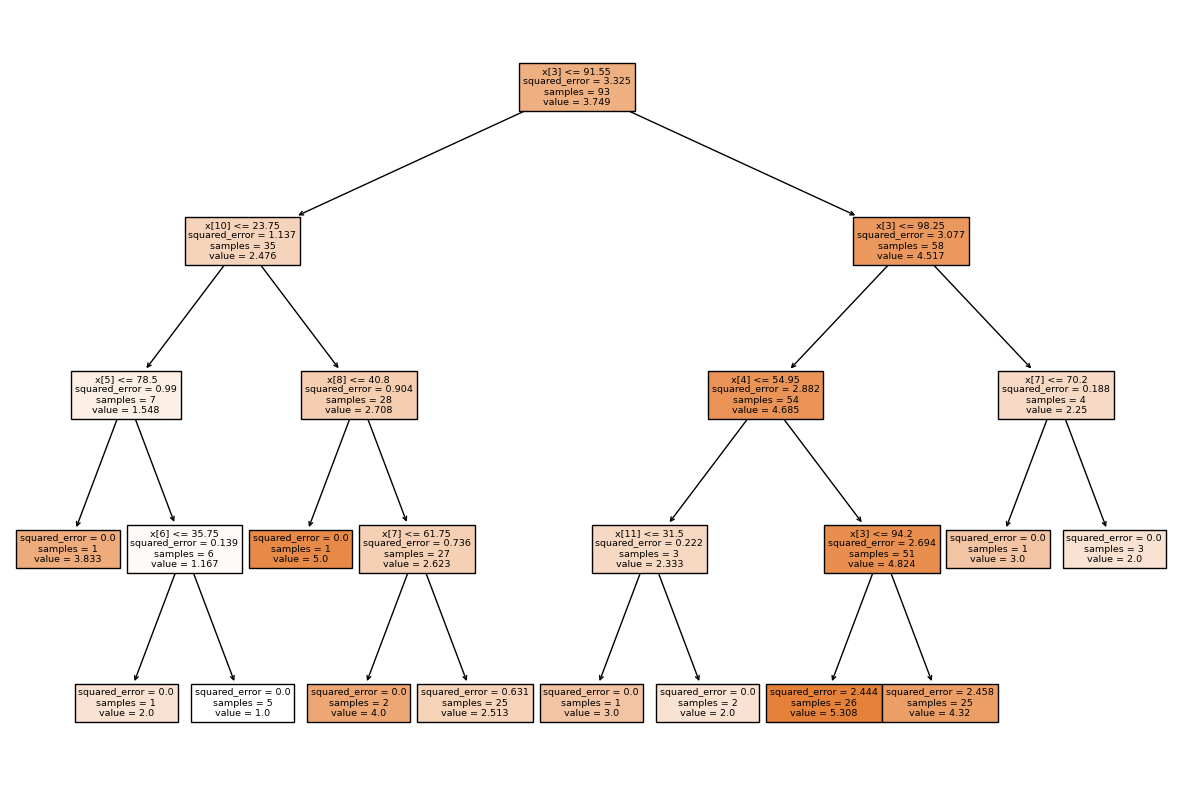

In [97]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(model,filled = True)
plt.show()

In [99]:
y_pred = model.predict(x_test)
y_pred

array([3.        , 2.        , 5.30769231, 4.32      , 5.30769231,
       2.        , 5.30769231, 5.30769231, 5.30769231, 4.        ,
       5.30769231])

In [101]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

In [103]:
mean_squared_error(y_test,y_pred)

3.2008098977945134

In [109]:
from sklearn.dummy import DummyRegressor

In [116]:
dup = DummyRegressor(strategy = "mean")

In [120]:
dup_model = dup.fit(x_train,y_train)

In [122]:
y_dup_prd = dup_model.predict(x_test)

In [124]:
mean_squared_error(y_test,y_dup_prd)

5.4275627123355195

In [126]:
r2_score(y_test,y_pred)

0.3322448316670067

In [ ]:
p